In [36]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os
import glob
import subprocess
%matplotlib inline

In [67]:
# get path/file/strain names
ref_gen_path = glob.glob('/media/fridoling/milano/sequencing/*.fa')[0]
file_paths = glob.glob('/media/fridoling/milano/sequencing/round2/*.bam')
file_names = [os.path.basename(s) for s in file_paths]
strain_names = [f.split('.')[0] for f in files]

In [60]:
# run pileup in shell
cmd = 'samtools mpileup -B -Q 30 -f '+ref_gen_path+' '+' '.join(file_paths)
with open('/media/fridoling/milano/sequencing/round2/pileup_round2a.txt', 'w') as f:
    out = subprocess.call(cmd, stdout=f, shell=True)

In [61]:
# generate coverage per bin for pileup file
blocksize = 10000
pos_count = 0
n_strains = len(strain_names)
df = pd.DataFrame()
with open('/media/fridoling/milano/sequencing/round2/pileup_round2a.txt', 'r') as f:
    while True:
        array_temp = np.zeros((blocksize, n_strains+1))
        for i in range(blocksize):
            line = f.readline().split()
            if not line:
                break
            if i==0:
                chr0 = line[0]
            if line[0]!=chr0:
                array_temp = array_temp[:i]
                break
            array_temp[i,0] = pos_count
            array_temp[i,1:n_strains+1] = [int(line[3*(s+1)]) for s in range(n_strains)]
            pos_count+=1
        d1 = {'chr': chr0, 'pos': np.median(array_temp[:,0])}
        d2 = {strain_names[s]: np.median(array_temp[:,s+1]) for s in range(n_strains)}
        df = df.append(dict(d1.items()+d2.items()), ignore_index=True)
        if not line:
            break

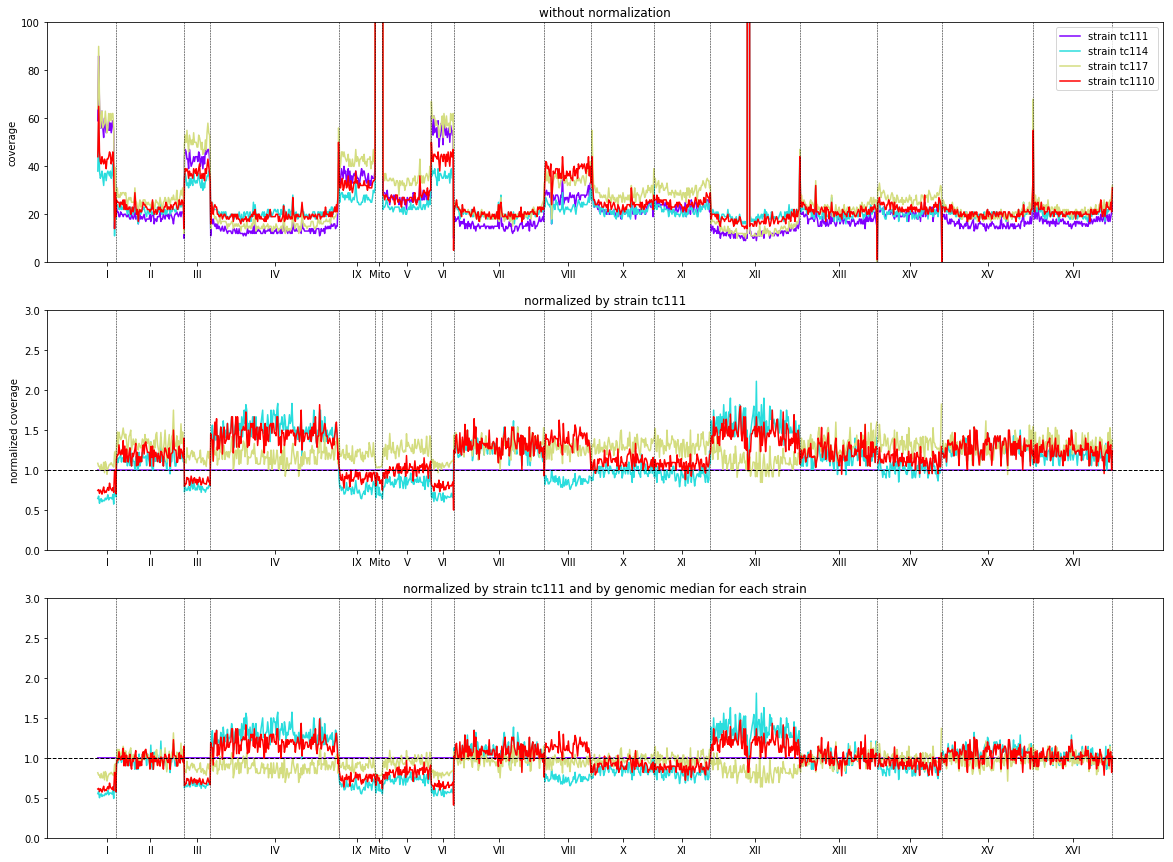

In [113]:
# plot absolute and normalized coverage
fig, ax = plt.subplots(3,1,figsize=(20,15))
labels = []
ticks = []
plot_strains = ['tc111', 'tc114', 'tc117', 'tc1110']
norm_strains = ['tc111']

color=iter(cm.rainbow(np.linspace(0,1,len(plot_strains))))

df_plot = df[plot_strains]/df[plot_strains].median(axis=0)
df_norm = df[norm_strains].median(axis=1)
df_norm2 = df_plot[norm_strains].median(axis=1)

for s in plot_strains:
    c=next(color)
    ax[0].plot(df.pos, df[s], linestyle='-',label='strain '+s, color=c)
    ax[1].plot(df.pos, df[s]/df_norm, color=c)
    ax[2].plot(df.pos, df_plot[s]/df_norm2, color=c)
    
for chr_i in df.chr.unique():
    pos_i = df.pos[df.chr==chr_i]
    labels.append(chr_i)
    ticks.append(np.median(pos_i))
    for i in range(len(ax)):
        ax[i].axvline(x=np.max(pos_i), linestyle='--', color='k', linewidth=0.5)

for i in range(len(ax)):
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(labels)

ax[1].axhline(y=1, linestyle='--', color='k', linewidth=1)
ax[2].axhline(y=1, linestyle='--', color='k', linewidth=1)
ax[0].set_ylim([0,100])
ax[1].set_ylim([0,3])
ax[2].set_ylim([0,3])
ax[0].set_title('without normalization')
ax[1].set_title('normalized by strain '+', '.join(norm_strains))
ax[2].set_title('normalized by strain '+', '.join(norm_strains)+' and by genomic median for each strain')
ax[0].set_ylabel('coverage')
ax[1].set_ylabel('normalized coverage')
ax[0].legend(loc=0)

plt.savefig('../figures/coverage_tc11_10kb.pdf')

In [72]:
df

,chr,pos,tc11,tc110,tc111,tc1110,tc114,tc117,tc14,tc17
0,I,4999.5,96.0,52.0,59.0,44.0,38.0,64.0,58.0,48.0
1,I,14999.5,137.0,83.0,86.0,65.0,58.0,90.0,77.0,64.0
2,I,24999.5,99.0,57.0,65.0,46.0,38.0,68.0,63.0,52.0
3,I,34999.5,88.0,51.0,56.0,42.0,35.0,56.0,56.0,48.0
4,I,44999.5,89.0,54.0,56.0,41.0,36.0,60.0,56.0,48.0
5,I,54999.5,94.0,55.0,63.0,44.0,38.0,63.0,61.0,47.0
6,I,64999.5,87.0,51.0,56.0,42.0,35.0,56.0,54.0,46.0
7,I,74999.5,83.0,53.0,52.0,41.0,32.0,57.0,54.0,42.0
8,I,84999.5,93.0,57.0,60.0,43.0,37.0,58.0,61.0,46.0
9,I,94999.5,93.0,53.0,57.0,42.0,37.0,63.0,58.0,47.0


In [90]:
df[plot_strains]/df[plot_strains].median(axis=0)

,tc11,tc14,tc17,tc110
0,2.594595,2.32,2.40,2.888889
1,3.702703,3.08,3.20,4.611111
2,2.675676,2.52,2.60,3.166667
3,2.378378,2.24,2.40,2.833333
4,2.405405,2.24,2.40,3.000000
5,2.540541,2.44,2.35,3.055556
6,2.351351,2.16,2.30,2.833333
7,2.243243,2.16,2.10,2.944444
8,2.513514,2.44,2.30,3.166667
9,2.513514,2.32,2.35,2.944444
